# <center> Predicción de compra por cliente a partir de cotizaciones de una empresa </center>
<center> <img src="https://github.com/Minerisho/Proyecto-AI1-2022-2/blob/main/Banner.jpg?raw=true" width="800px" height="300px"> </center>
<center>Miguel Ángel Plata Rodríguez </center>
<center>Adriana Marcela Cujia Reyes </center>
<center>Sebastían Suarez </center>




1.   [Tratamiento del Dataset](#Df)
2.   [DTR](#DTR) 
3.   [RFR](#RFR)
4.   [SVR](#SVR)




## Librerias y conexión a Drive

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import *
import os
from google.colab import drive


In [2]:
path_ai = "ProyectoIA"
path = "/content/drive/My Drive/" + path_ai
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())


Mounted at /content/drive
/content/drive/My Drive/ProyectoIA


In [3]:
df = pd.read_excel('DataFrames/prueba/df100.xls')
df.head(200)


,N_Cot,Cliente,Fecha,N_Productos_Total,Capacitacion,V_Total,Descuento,document
0,751,Eduardo Ramirez,2016-05-03,2,False,273760.00,False,Cotización 751 -Eduardo Ramirez- (PLA) 2.85mm
1,752,DAR Soluciones,2016-05-03,2,False,6641000.00,False,Cotización 752 - DAR Soluciones (PLA-ABS)
2,753,Paola Buitrago,2016-05-04,3,True,3089520.00,False,Cotización 753 - Paola Buitrago - Micro + insumos
3,754,BPM Global Solutions,2016-05-04,6,True,24831784.00,True,Cotización 754 -BPM Global Solutions- Makerbot...
4,755,Diego Salazar,2016-05-05,2,True,21451000.00,True,Cotización 755 -Diego Salazar- Scanners 3D (Fu...
...,...,...,...,...,...,...,...,...
95,847,Victor Melgarejo,2016-07-14,1,True,16400000.00,False,Cotización 847 - Victor Melgarejo - Leapfrg Cr...
96,848,Solutions Group S.A.S.,2016-07-14,2,False,2025360.00,False,Cotización 848 - Solutions - Mantenimiento Z18
97,849,Analytica,2016-07-15,8,True,40901725.42,True,Cotización 849 - Universidad Colegio Mayor F2...
98,850,John Fredy Rodríguez,2016-07-16,2,True,17645694.00,True,Cotización 850 - John Rodriguez - U2+ EXTENDED


# Tratamiendo del DF <a name="Df">  </a>

In [4]:
df.drop(['N_Cot', 'document'], axis= 'columns', inplace=True)
df

,Cliente,Fecha,N_Productos_Total,Capacitacion,V_Total,Descuento
0,Eduardo Ramirez,2016-05-03,2,False,273760.00,False
1,DAR Soluciones,2016-05-03,2,False,6641000.00,False
2,Paola Buitrago,2016-05-04,3,True,3089520.00,False
3,BPM Global Solutions,2016-05-04,6,True,24831784.00,True
4,Diego Salazar,2016-05-05,2,True,21451000.00,True
...,...,...,...,...,...,...
95,Victor Melgarejo,2016-07-14,1,True,16400000.00,False
96,Solutions Group S.A.S.,2016-07-14,2,False,2025360.00,False
97,Analytica,2016-07-15,8,True,40901725.42,True
98,John Fredy Rodríguez,2016-07-16,2,True,17645694.00,True


In [5]:
NomUniq = df['Cliente'].unique()
print(NomUniq)
df['Cliente'], cliente_gt = pd.factorize(df['Cliente'])
df['Capacitacion'], capacitacion_gt = pd.factorize(df['Capacitacion'])
df['Descuento'], descuento_gt = pd.factorize(df['Descuento'])
df['Fecha'], fecha_gt = pd.factorize(df['Fecha'])
df



['Eduardo Ramirez' 'DAR Soluciones' 'Paola Buitrago'
 'BPM Global Solutions' 'Diego Salazar' 'UNIVERSIDAD DE LOS ANDES'
 'Daniela gomez' 'ASSA ABLOY - YALE' 'Colegio Colombo Británico'
 'Iproyect Cali' 'Jhon Fredy Correa' 'Nubia Godoy Miranda'
 'Leonel José Paredes' 'Pontificia Universidad Javeriana Bogotá'
 'RTR S.A.S.' 'Felipe Franco' 'Jose Fernando Perez Villa'
 'Tecnología Ambiental NOW' 'Freddy Parra' 'Juan Carlos Fonseca'
 'Sandra Perez' 'Universidad Manuela Beltrán' 'TEK SOLUCIONES'
 'Universidad Santo Tomás Bucaramanga' 'Ivan Ponce' 'John Fredy Rodriguez'
 'Universidad Colegio Mayor de Antioquia' 'Ciro Nugnez' 'Luz Chacon'
 'Universidad Pontificia Javeriana' 'MUNDIAL DE COMPUTADORES'
 'Mundial de Computadores' 'Silvia Moreno' 'Zuministra Distribuciones'
 'Robertson Becerra' 'Universidad de Boyacá' 'Suconel S.A.'
 'Pontificia Universidad Javeriana' 'Universidad Nacional de Colombia'
 'Nestor Julio Sanchez' 'Colombo Americano Pereira'
 'Unidades Tecnológicas de Santander' 'German

,Cliente,Fecha,N_Productos_Total,Capacitacion,V_Total,Descuento
0,0,0,2,0,273760.00,0
1,1,0,2,0,6641000.00,0
2,2,1,3,1,3089520.00,0
3,3,1,6,1,24831784.00,1
4,4,2,2,1,21451000.00,1
...,...,...,...,...,...,...
95,72,44,1,1,16400000.00,0
96,81,44,2,0,2025360.00,0
97,82,45,8,1,40901725.42,1
98,83,46,2,1,17645694.00,1


In [1]:
# PIE de los datos de cada columna, no es muy útil más allá de los que son true y false...

#cantidad = df['Capacitacion'].value_counts()
#print(cantidad)
#print(cantidad.index)
#print(cantidad.values)
  
#fig1, ax1 = plt.subplots(figsize = (5,5))
#ax1.pie(cantidad.values, labels=cantidad.index, autopct='%1.1f%%', startangle=90, title="Distribución de la columna")
#ax1.axis('equal')  

#plt.show()


In [6]:
y = df[['V_Total']]
X = df[['Cliente', 'Fecha', 'N_Productos_Total', 'Capacitacion', 'Descuento']]
print(y.shape, X.shape)

(100, 1) (100, 5)


# Decision Tree <a name="DTR"></a>

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
est = DecisionTreeRegressor()

est.fit(X_train,y_train)
y_pred = est.predict(X_test)

print(mean_squared_error(y_test, y_pred))

282967546354982.6


Tunning

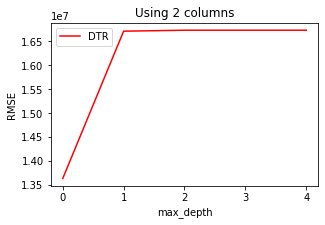

In [ ]:
scores1=[]
for md in [2,10,50,100,500]:
      est1 = DecisionTreeRegressor(random_state=21,max_depth=md)
      est1.fit(X_train,y_train)
      pred = est1.predict(X_test)
      rmse = np.sqrt(mean_squared_error(y_test,pred))
      scores1.append(rmse)

f = plt.figure(figsize=(12,3))
f.subplots_adjust(wspace=0.5)


ax1 = f.add_subplot(121)
ax1.set_title('Using 2 columns')
ax1.plot(range(5), scores1, c='red', label='DTR')
ax1.set_xlabel('max_depth')
ax1.set_ylabel('RMSE')
ax1.legend()


### Cross validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

est = DecisionTreeRegressor()

s = cross_val_score(est, X, y, cv=KFold(100, shuffle=True), scoring=make_scorer(mean_squared_error))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 246884390980265.406 (+/- 603408088553196.87500)


Tunning

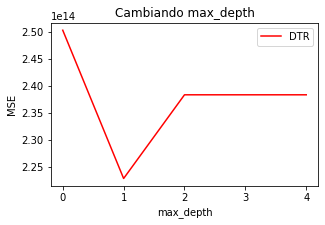

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
scores2=[]
for md in [2,10,50,100,500]:
  est1 = DecisionTreeRegressor(random_state=21,max_depth=md)
  s = cross_val_score(est1, X, y, cv=KFold(100, shuffle=True), scoring=make_scorer(mean_squared_error))
  scores2.append(np.mean(s))

f = plt.figure(figsize=(12,3))
f.subplots_adjust(wspace=0.5)


ax1 = f.add_subplot(121)
ax1.set_title('Cambiando max_depth')
ax1.plot(range(5), scores2, c='red', label='DTR')
ax1.set_xlabel('max_depth')
ax1.set_ylabel('MSE')
ax1.legend()



# Random Forest <a name="RFR"></a>

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
est2 = RandomForestRegressor(random_state=21)
est2.fit(X_train,y_train.values.ravel())
y_pred = est2.predict(X_test)

print(mean_squared_error(y_test, y_pred))

159082113784260.12


Tunning

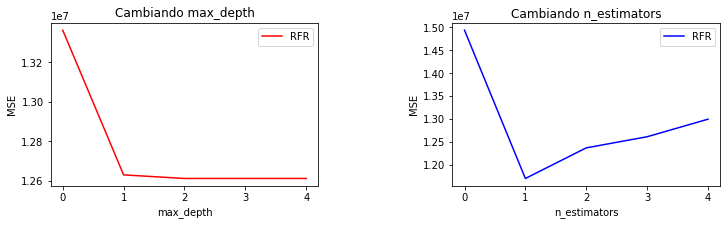

In [ ]:
scoresRF=[]
for md in [2,10,50,100,500]:
      est1 = RandomForestRegressor(random_state=21,max_depth=md)
      est1.fit(X_train,y_train.values.ravel())
      pred = est1.predict(X_test)
      mse = np.sqrt(mean_squared_error(y_test.values.ravel(),pred))
      scoresRF.append(mse)

f = plt.figure(figsize=(12,3))
f.subplots_adjust(wspace=0.5)


ax1 = f.add_subplot(121)
ax1.set_title('Cambiando max_depth')
ax1.plot(range(5), scoresRF, c='red', label='RFR')
ax1.set_xlabel('max_depth')
ax1.set_ylabel('MSE')
ax1.legend()

scoresRF2=[]
for md in [2,10,50,100,500]:
      est1 = RandomForestRegressor(random_state=21, n_estimators=md)
      est1.fit(X_train,y_train.values.ravel())
      pred = est1.predict(X_test)
      mse = np.sqrt(mean_squared_error(y_test.values.ravel(),pred))
      scoresRF2.append(mse)

ax2 = f.add_subplot(122)
ax2.set_title('Cambiando n_estimators')
ax2.plot(range(5), scoresRF2, c='blue', label='RFR')
ax2.set_xlabel('n_estimators')
ax2.set_ylabel('MSE')
ax2.legend()


Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

est = RandomForestRegressor()

s = cross_val_score(est, X, y.values.ravel(), cv=KFold(100, shuffle=True), scoring=make_scorer(mean_squared_error))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 134357605282148.203 (+/- 238608053981478.81250)


Tunning

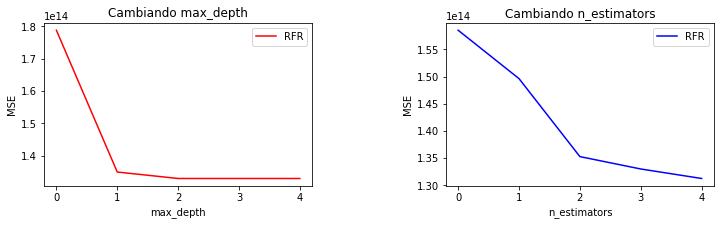

In [ ]:
scoresRF=[]
for md in [2,10,50,100,500]:
      est1 = RandomForestRegressor(random_state=21,max_depth=md)
      s = cross_val_score(est1, X, y.values.ravel(), cv=KFold(100, shuffle=True), scoring=make_scorer(mean_squared_error))
      scoresRF.append(np.mean(s))

f = plt.figure(figsize=(12,3))
f.subplots_adjust(wspace=0.5)


ax1 = f.add_subplot(121)
ax1.set_title('Cambiando max_depth')
ax1.plot(range(5), scoresRF, c='red', label='RFR')
ax1.set_xlabel('max_depth')
ax1.set_ylabel('MSE')
ax1.legend()

scoresRF2=[]
for md in [2,10,50,100,500]:
      est1 = RandomForestRegressor(random_state=21,n_estimators=md)
      s = cross_val_score(est1, X, y.values.ravel(), cv=KFold(100, shuffle=True), scoring=make_scorer(mean_squared_error))
      scoresRF2.append(np.mean(s))

ax2 = f.add_subplot(122)
ax2.set_title('Cambiando n_estimators')
ax2.plot(range(5), scoresRF2, c='blue', label='RFR')
ax2.set_xlabel('n_estimators')
ax2.set_ylabel('MSE')
ax2.legend()

# Support Vectorial Regressor <a name="SVR"></a>

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(1.72, 3.5, '35043371')

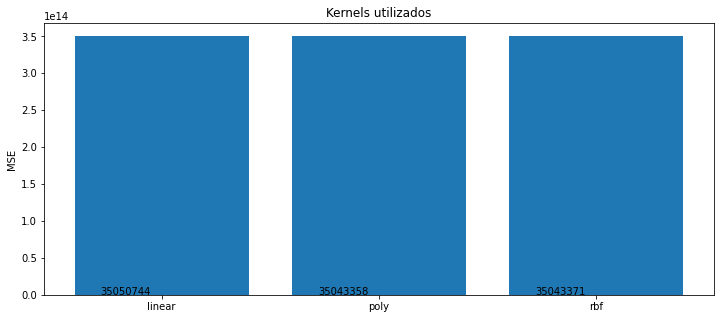

In [21]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, mean_squared_error

data = X
data_y = y
X_train, X_test, y_train, y_test = train_test_split(data,data_y,test_size=0.1,shuffle=True)
scores = []
kernels = ['linear', 'poly', 'rbf']
for i in kernels:
  est = SVR(kernel=i)
  est.fit(X_train,y_train)
  pred = est.predict(X_test)
  mse = mean_squared_error(y_test,pred)
  scores.append(mse)

f = plt.figure(figsize=(30,5))
f.subplots_adjust(wspace=0.5)
ax1 = f.add_subplot(121)
ax1.set_title('Kernels utilizados')
ax1.bar(range(0,len(scores)), scores)
ax1.set_xticks(range(0,len(scores)))
ax1.set_xticklabels(('linear', 'poly', 'rbf'))
ax1.set_ylabel('MSE')
ax1.text(-0.28, 3.5, str(scores[0])[:8])
ax1.text(0.72, 3.5, str(scores[1])[:8])
ax1.text(1.72, 3.5, str(scores[2])[:8])